## Simple CNN for Edgelovers
In this notebook you train a very simple CNN with only 1 kernel to discriminate images containing vertical (y=0) from those containing horizontal stripes (y=1). You can use keras for the solution.

### a) Generation of the data
Write a function which creates an artficially dataset of greyscale images (50x50 pixel) with 10 vertical or horizontal bars (10 pixel long). Use this function to create a training and validation dataset of 1000 examples each.

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import keras
from keras import optimizers
from keras.regularizers import l2
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D, Dropout
from keras.utils import to_categorical

In [2]:
def generate_hor_img(x_size,y_size,bars):
    image = np.random.random((x_size, y_size, 1)) * 128        
    for _ in range(bars):
        y = np.random.randint(1, y_size)
        x1 = np.random.randint(1, x_size - 10)
        x2 = x1 + 10
        image[y, x1:x2] = 255.0
    return image, 1.0

In [3]:
def generate_vert_img(x_size,y_size,bars):
    image = np.random.random((x_size, y_size, 1)) * 128        
    for _ in range(bars):
        x = np.random.randint(1, y_size)
        y1 = np.random.randint(1, y_size - 10)
        y2 = y1 + 10
        image[y1:y2, x] = 255.0
    return image, 0.0

In [4]:
def data_generation(number, x_size, y_size):
    data = np.zeros(shape=(number, x_size, y_size, 1), dtype=np.uint8)
    labels = np.zeros(shape=(number), dtype=np.int).squeeze()
    for i in range(number):        
            orientation = np.random.randint(0, 2)
            if orientation == 0:
                data[i],labels[i] = generate_hor_img(x_size,y_size, 10)
            else:
                data[i],labels[i] = generate_vert_img(x_size,y_size, 10)
    return data, labels.squeeze()       
        

In [5]:
train_data, train_label = data_generation(1000, 50,50)

In [6]:
val_data, val_label = data_generation(1000, 50,50)

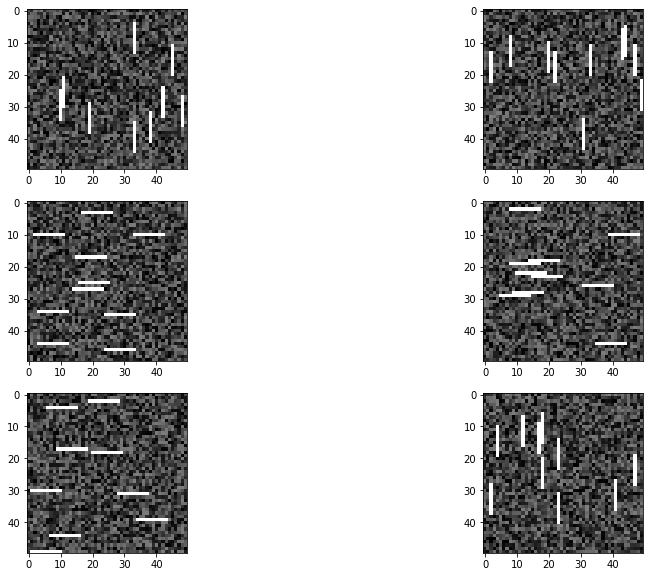

In [7]:
fig=plt.figure(figsize=(15, 10))
columns = 2
rows = 3
for i in range(1, columns*rows +1):
    img = train_data[i, :, :, 0]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
plt.show()

### b) Build the simplest possible CNN
Make a CNN with one convolution (5x5, haveing two outputs (one for horizontal, one for vertical). Train the CNN on the data from a). You should have at max trainable 32 parameters in the network.

- Plot the learning curves: (epochs vs training loss and validation loss) and epochs vs accuracy.You should get an accuracy of approximatly 1.

Hint: Use the max-pooling operation in a clever way.

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [27]:
kernel = 2
epochs = 100
bs = 8

#create model
model = Sequential()
#add model layers
model.add(Conv2D(1, kernel_size=(5,5), activation='relu', input_shape=(50,50,1)))
model.add(MaxPooling2D(pool_size=(46, 46), padding='valid', data_format=None))
model.add(Flatten())
model.add(Dense(2, activation='sigmoid'))

optim = keras.optimizer.Adam(lr = 0.9)
model.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['acc'])
model.summary()


AttributeError: module 'keras' has no attribute 'optimizer'

In [28]:
history = model.fit(train_data, keras.utils.to_categorical(train_label), batch_size=bs, epochs=epochs, validation_data=(val_data, keras.utils.to_categorical(val_label)));

RuntimeError: You must compile a model before training/testing. Use `model.compile(optimizer, loss)`.

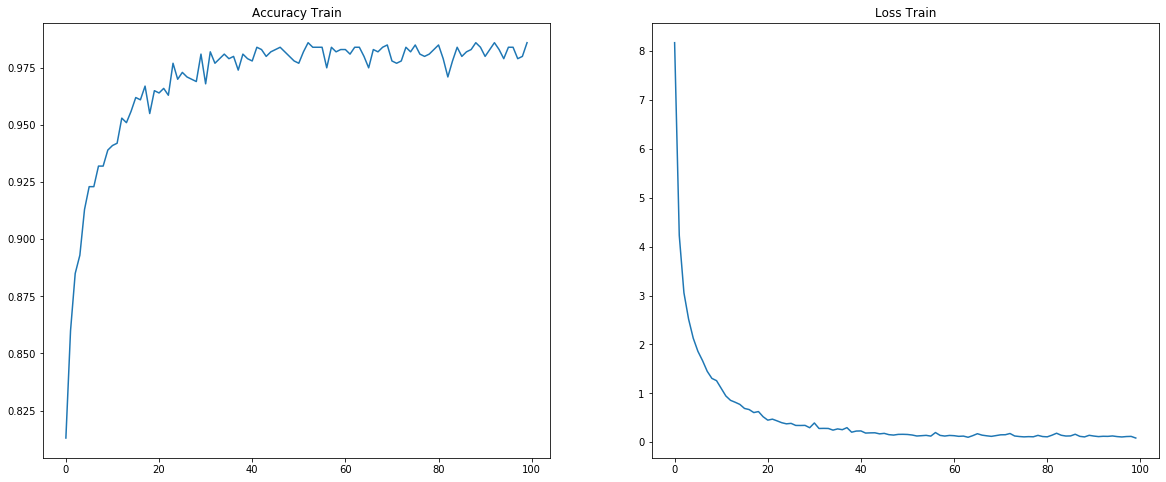

In [170]:
fig = plt.figure(figsize = (20,8))
plt.subplot(121)
plt.title("Accuracy Train")
plt.plot(history.history["acc"])
plt.subplot(122)
plt.title("Loss Train")
plt.plot(history.history["loss"])

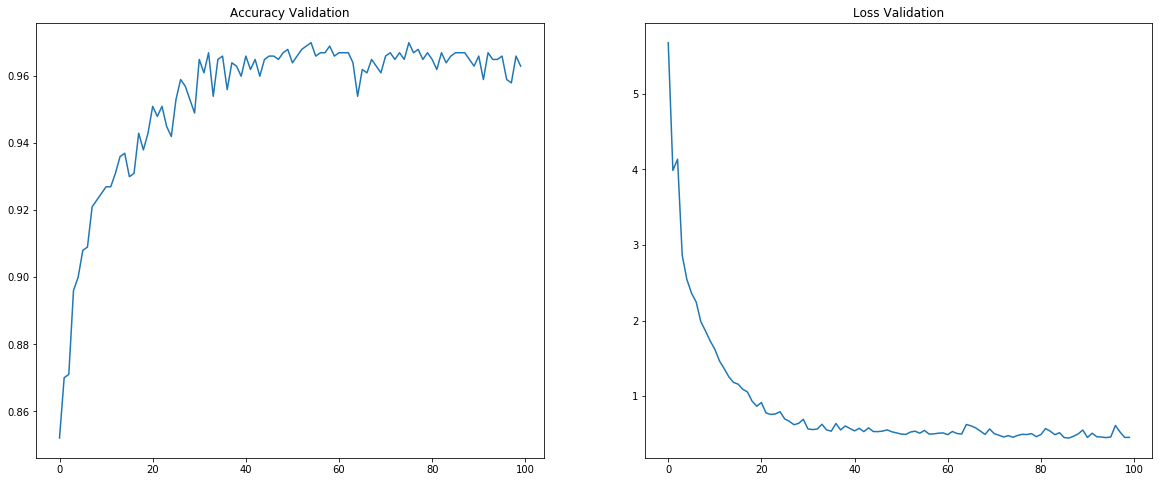

In [171]:
fig = plt.figure(figsize = (20,8))
plt.subplot(121)
plt.title("Accuracy Validation")
plt.plot(history.history["val_acc"])
plt.subplot(122)
plt.title("Loss Validation")
plt.plot(history.history["val_loss"])

### c) Visualize the learned kernel
Visualize the learned kernel, you might want to use model.get_weights(). Does the learned kernel makes sense?

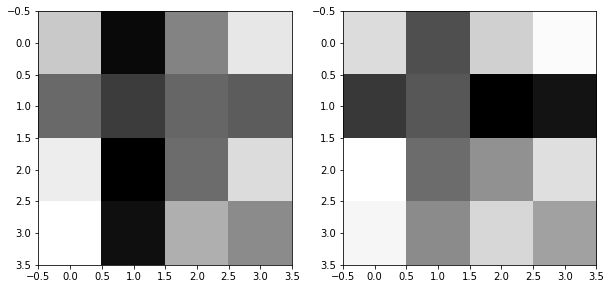

In [173]:
# retrieve weights from the second hidden layer
filters, biases = model.layers[0].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
rows = 1
columns = 2
ix = 0
fig, axes = plt.subplots(nrows=rows, ncols=columns, figsize=(10, 10))
for i in range(rows):
    for j in range(columns):
        filt = filters[:, :, 0, ix]
        axes[j].imshow(filt, cmap='gray');
        ix += 1

In [ ]:
# retrieve weights from the second hidden layer
filters, biases = model.layers[0].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
rows = 1
columns = 2
ix = 0
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))
for i in range(nrows):
    for j in range(ncols):
        filt = filters[:, :, 0, ix]
        axes[j].imshow(filt, cmap='gray');
        ix += 1